<a href="https://colab.research.google.com/github/tasosnikitakis/Data_Science_Notebooks/blob/main/FBREF_data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_html('https://fbref.com/en/comps/12/La-Liga-Stats')


In [11]:
for idx,table in enumerate(df):
 print("***************************")
 print(idx)
 print(table)

***************************
0
    Rk            Squad  MP  W  D  L  GF  GA  GD  Pts  Pts/MP   xG  xGA  xGD  \
0    1      Real Madrid   2  2  0  0   5   1   4    6     3.0  3.0  1.7  1.2   
1    2         Valencia   2  2  0  0   3   1   2    6     3.0  2.7  1.2  1.4   
2    3           Girona   2  1  1  0   4   1   3    4     2.0  2.2  1.7  0.5   
3    4  Atlético Madrid   2  1  1  0   3   1   2    4     2.0  2.8  1.7  1.1   
4    5        Barcelona   2  1  1  0   2   0   2    4     2.0  4.6  1.7  2.9   
5    6            Betis   2  1  1  0   2   1   1    4     2.0  1.8  1.3  0.5   
6    7   Rayo Vallecano   1  1  0  0   2   0   2    3     3.0  2.1  1.4  0.7   
7    8          Osasuna   2  1  0  1   2   2   0    3     1.5  2.3  2.5 -0.3   
8    9    Athletic Club   2  1  0  1   2   2   0    3     1.5  2.0  2.3 -0.3   
9   10       Villarreal   2  1  0  1   2   2   0    3     1.5  2.8  1.4  1.3   
10  11            Cádiz   2  1  0  1   1   2  -1    3     1.5  1.8  3.4 -1.7   
11  12    

In [47]:
la_liga_stats = df[3]

In [48]:
la_liga_stats.columns = la_liga_stats.columns.droplevel()

In [49]:
la_liga_stats

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Gls,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG
0,vs Alavés,16,29.8,45.0,1,11,90,1.0,1,1,...,1.0,1.0,2.0,1.0,2.0,0.66,0.45,1.10,0.66,1.10
1,vs Almería,20,28.6,48.5,2,22,180,2.0,5,2,...,2.5,1.0,3.5,1.5,2.5,2.06,1.01,3.07,1.27,2.28
2,vs Athletic Club,18,27.3,58.5,2,22,180,2.0,2,2,...,1.0,1.0,2.0,1.0,2.0,1.13,0.89,2.01,1.13,2.01
3,vs Atlético Madrid,19,28.1,53.5,2,22,180,2.0,1,1,...,0.5,0.5,1.0,0.5,1.0,0.84,0.71,1.55,0.84,1.55
4,vs Barcelona,18,29.5,26.0,2,22,180,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.84,0.51,1.35,0.84,1.35
5,vs Betis,17,28.7,55.0,2,22,180,2.0,1,1,...,0.5,0.5,1.0,0.5,1.0,0.67,0.51,1.18,0.67,1.18
6,vs Cádiz,19,26.2,64.5,2,22,180,2.0,2,2,...,1.0,1.0,2.0,1.0,2.0,1.72,1.28,3.00,1.72,3.00
7,vs Celta Vigo,18,27.3,50.0,2,22,180,2.0,3,1,...,1.5,0.5,2.0,1.5,2.0,0.83,0.53,1.36,0.83,1.36
8,vs Getafe,16,26.9,68.5,2,22,180,2.0,3,2,...,1.5,1.0,2.5,1.5,2.5,1.43,1.18,2.60,1.43,2.60
9,vs Girona,17,27.0,42.5,2,22,180,2.0,1,1,...,0.5,0.5,1.0,0.5,1.0,0.87,0.67,1.54,0.87,1.54


In [27]:
shooting = pd.read_html('https://fbref.com/en/comps/12/shooting/La-Liga-Stats')

In [29]:
for idx,table in enumerate(shooting):
    print("********************")
    print(idx)
    print(table)

********************
0
   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard          \
                Squad               # Pl                90s      Gls  Sh SoT   
0              Alavés                 16                1.0        0  10   2   
1             Almería                 20                2.0        1  39  13   
2       Athletic Club                 18                2.0        2  15   3   
3     Atlético Madrid                 19                2.0        3  19   7   
4           Barcelona                 18                2.0        2  37  13   
5               Betis                 17                2.0        2  26   5   
6               Cádiz                 19                2.0        1  22   4   
7          Celta Vigo                 18                2.0        1  28   6   
8              Getafe                 16                2.0        0  14   4   
9              Girona                 17                2.0        4  13   7   
10            Gra

In [32]:
shooting = pd.DataFrame(shooting[0])

In [35]:
shooting.columns = shooting.columns.droplevel()

In [36]:
shooting.columns

Index(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG'],
      dtype='object')

In [37]:
shooting

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Alavés,16,1.0,0,10,2,20.0,10.0,2.0,0.00,0.00,22.1,0,0,0,0.3,0.3,0.03,-0.3,-0.3
1,Almería,20,2.0,1,39,13,33.3,19.5,6.5,0.03,0.08,18.5,0,0,0,2.7,2.7,0.07,-1.7,-1.7
2,Athletic Club,18,2.0,2,15,3,20.0,7.5,1.5,0.13,0.67,15.7,1,0,0,2.0,2.0,0.13,0.0,0.0
3,Atlético Madrid,19,2.0,3,19,7,36.8,9.5,3.5,0.16,0.43,14.3,0,0,0,2.8,2.8,0.15,0.2,0.2
4,Barcelona,18,2.0,2,37,13,35.1,18.5,6.5,0.05,0.15,17.2,3,0,0,4.6,4.6,0.13,-2.6,-2.6
5,Betis,17,2.0,2,26,5,19.2,13.0,2.5,0.08,0.40,17.8,1,0,0,1.8,1.8,0.07,0.2,0.2
6,Cádiz,19,2.0,1,22,4,18.2,11.0,2.0,0.05,0.25,15.1,1,0,0,1.8,1.8,0.08,-0.8,-0.8
7,Celta Vigo,18,2.0,1,28,6,21.4,14.0,3.0,0.04,0.17,17.1,1,0,0,2.0,2.0,0.08,-1.0,-1.0
8,Getafe,16,2.0,0,14,4,28.6,7.0,2.0,0.00,0.00,17.1,1,0,0,1.3,1.3,0.09,-1.3,-1.3
9,Girona,17,2.0,4,13,7,53.8,6.5,3.5,0.31,0.57,14.3,1,0,0,2.2,2.2,0.17,1.8,1.8


In [50]:
top4 = ['Real Madrid','Sevilla','Barcelona','Atlético Madrid']

In [51]:
subset_shooting = shooting[shooting['Squad'].isin(top4)]

''

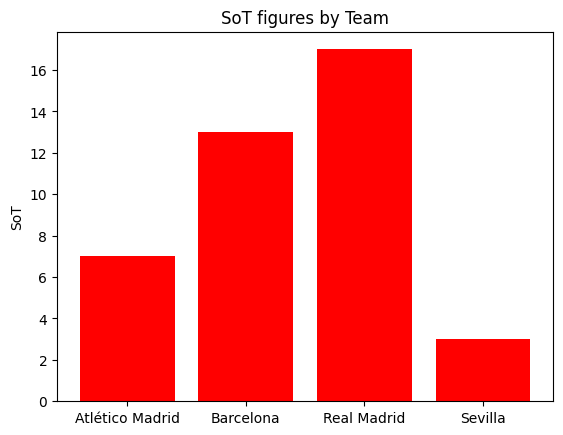

In [52]:
plt.bar(subset_shooting['Squad'],subset_shooting['SoT'], color = 'red')
plt.title('SoT figures by Team')
plt.ylabel('SoT')
;

Specify URLS



In [53]:
urls = ['https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures']

Loop through the URL list and append them to a pandas dataframe.



In [54]:
epl_df_list = []

for url in urls:
    epl_df_list.append(pd.read_html(url,index_col=False)[0])
    epl_df = pd.concat(epl_df_list, axis=0, ignore_index=True)

Remove the NAN values



In [55]:
epl_df = epl_df[epl_df['Wk'].notna()]

Rename the XG columns

In [56]:
epl_df = epl_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})

Add the scores columns by slicing.



In [57]:
epl_df['HomeScore'] = epl_df['Score'].str[0]
epl_df['AwayScore'] = epl_df['Score'].str[2]

Drop the irrelevant fields



In [58]:
epl_df = epl_df.drop(['Match Report','Notes'],axis=1)


Order by date

In [59]:
#convert to date

epl_df['Date'] = pd.to_datetime(epl_df['Date'])

In [60]:
epl_df.sort_values(by='Date', inplace=True)

In [61]:
epl_df = epl_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [62]:
epl_df

,Wk,Day,Date,Time,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee
1732,1.0,Fri,2017-08-11,19:45,Arsenal,4,2.5,3,1.5,Leicester City,59387.0,Emirates Stadium,Mike Dean
1739,1.0,Sat,2017-08-12,17:30,Brighton,0,0.3,2,1.9,Manchester City,30415.0,The American Express Community Stadium,Michael Oliver
1733,1.0,Sat,2017-08-12,12:30,Watford,3,2.1,3,2.6,Liverpool,20407.0,Vicarage Road Stadium,Anthony Taylor
1734,1.0,Sat,2017-08-12,15:00,Crystal Palace,0,1.1,3,1.5,Huddersfield,25448.0,Selhurst Park,Jonathan Moss
1735,1.0,Sat,2017-08-12,15:00,West Brom,1,1.3,0,0.5,Bournemouth,25011.0,The Hawthorns,Robert Madley
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,38.0,Sun,2022-05-22,16:00,Leicester City,4,3.4,1,1.1,Southampton,32003.0,King Power Stadium,Jonathan Moss
438,38.0,Sun,2022-05-22,16:00,Brentford,1,0.8,2,1.3,Leeds United,16957.0,Brentford Community Stadium,Paul Tierney
446,38.0,Sun,2022-05-22,16:00,Burnley,1,1.6,2,1.8,Newcastle Utd,21361.0,Turf Moor,Craig Pawson
440,38.0,Sun,2022-05-22,16:00,Crystal Palace,1,0.6,0,0.7,Manchester Utd,25434.0,Selhurst Park,Martin Atkinson
